In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
TTF = pd.read_csv("https://raw.githubusercontent.com/Nicolas271101/ppw/main/cvjpgsd.csv")
TTF

,Judul,ab,abad,abar,abd,abdurrahman,abel,abir,abjad,abk,...,yusuf,zakat,zaman,zehro,zhitung,zholam,zn,zr,ztabel,zulfa
0,Pengaruh Penggunaan Media Audio Visual Terhada...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Strategi Sekolah dalam Upaya Penguatan Karakte...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Perbandingan Hasil Belajar Cooperative Learnin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hubungan Antara Kemandirian Belajar dengan Has...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,Problematika Pembelajaran Daring Siswa Kelas R...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
TF = pd.read_csv("https://raw.githubusercontent.com/Nicolas271101/ppw/main/cvpgsd.csv")
TF

,ab,abad,abai,abar,abd,abdi,abdurrahman,abel,abir,abjad,...,yusuf,zakat,zaman,zehro,zhitung,zholam,zn,zr,ztabel,zulfa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#jumlah topik, parameter topik dalam satu dokumen, parameter dalam setiap kata ke dalam satu topik, parameter nilai acak, terasi dalam lda
lda = LatentDirichletAllocation(n_components=6, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
lda_top=lda.fit_transform(TF)

In [7]:
judul = TTF["Judul"]

In [8]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(913, 6)
[[2.03723787e-03 8.31468379e-01 2.03203910e-03 2.02417350e-03
  2.03018241e-03 1.60407988e-01]
 [9.92610737e-01 1.47521535e-03 1.47280701e-03 1.48758909e-03
  1.47831438e-03 1.47533741e-03]
 [1.96152539e-03 1.96987630e-03 1.26687770e-01 1.95832418e-03
  2.44114074e-01 6.23308430e-01]
 ...
 [1.04315353e-01 9.75769870e-04 9.67616817e-04 8.91797942e-01
  9.74127225e-04 9.69191587e-04]
 [2.19489761e-03 9.89039394e-01 2.17645030e-03 2.19895241e-03
  2.21124968e-03 2.17905619e-03]
 [1.98376785e-01 1.70366010e-03 7.94808393e-01 1.71259487e-03
  1.70419639e-03 1.69437053e-03]]


In [9]:
#bobot setiap topik terhadap dokumen
U = pd.DataFrame(lda_top, columns=['Topik 1','Topik 2','Topik 3','Topik 4','Topik 5','Topik 6'])
U["Judul"] = judul
U

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Judul
0,0.002037,0.831468,0.002032,0.002024,0.002030,0.160408,Pengaruh Penggunaan Media Audio Visual Terhada...
1,0.992611,0.001475,0.001473,0.001488,0.001478,0.001475,Strategi Sekolah dalam Upaya Penguatan Karakte...
2,0.001962,0.001970,0.126688,0.001958,0.244114,0.623308,Perbandingan Hasil Belajar Cooperative Learnin...
3,0.002254,0.002248,0.002256,0.988723,0.002265,0.002255,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...
4,0.002622,0.002632,0.002621,0.002611,0.986891,0.002623,Hubungan Antara Kemandirian Belajar dengan Has...
...,...,...,...,...,...,...,...
908,0.001500,0.001508,0.992473,0.001497,0.001508,0.001514,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...
909,0.001842,0.001857,0.371237,0.001850,0.001865,0.621350,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...
910,0.104315,0.000976,0.000968,0.891798,0.000974,0.000969,Problematika Pembelajaran Daring Siswa Kelas R...
911,0.002195,0.989039,0.002176,0.002199,0.002211,0.002179,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...


In [10]:
print(lda.components_)
print(lda.components_.shape)  # (no_of_topics*no_of_words)

[[1.74965067 0.10016838 0.30439954 ... 2.0995227  0.50261065 0.10002677]
 [0.10008741 0.10017835 0.10004379 ... 0.10008527 0.10004793 0.10002111]
 [0.10007482 0.72748317 0.10004262 ... 0.10010243 0.10071593 1.09987745]
 [0.10008324 2.0743115  0.68261422 ... 0.10009469 0.10005535 0.10002302]
 [0.10007374 0.10016419 0.31284154 ... 0.10010392 0.23112056 0.10002223]
 [0.45003012 0.49769442 0.10005829 ... 0.10009099 0.56544958 0.10002941]]
(6, 4394)


In [11]:
#bobot setiap kata terhadap topik
label=[]
for i in range (1,(lda.components_.shape[1]+1)):
  masukan = TF.columns[i-1]
  label.append(masukan)
VT_tabel = pd.DataFrame(lda.components_,columns=label)
VT_tabel.rename(index={0:"Topik 1",1:"Topik 2",2:"Topik 3",3:"Topik 4",4:"Topik 5",5:"Topik 6"}).transpose()

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6
ab,1.749651,0.100087,0.100075,0.100083,0.100074,0.450030
abad,0.100168,0.100178,0.727483,2.074311,0.100164,0.497694
abai,0.304400,0.100044,0.100043,0.682614,0.312842,0.100058
abar,0.100179,0.100194,0.100214,0.100182,0.730733,5.468498
abd,0.100057,0.171600,0.213376,0.100039,0.852327,0.162601
...,...,...,...,...,...,...
zholam,0.130634,0.100039,0.100034,0.100049,0.410653,0.758591
zn,0.100089,0.781593,0.100078,0.100077,0.418054,0.100110
zr,2.099523,0.100085,0.100102,0.100095,0.100104,0.100091
ztabel,0.502611,0.100048,0.100716,0.100055,0.231121,0.565450


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(lda_top)
cluster_labels = kmeans.labels_
data = {'Dokumen': range(len(cluster_labels)), 'Cluster': cluster_labels}
duf = pd.DataFrame(data)
duf
# CL = duf["Cluster"]
# CL

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Dokumen,Cluster
0,0,1
1,1,1
2,2,2
3,3,1
4,4,1
...,...,...
908,908,0
909,909,2
910,910,1
911,911,1


In [13]:
#bobot setiap topik terhadap dokumen
U["Clustering"] = cluster_labels
U

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Judul,Clustering
0,0.002037,0.831468,0.002032,0.002024,0.002030,0.160408,Pengaruh Penggunaan Media Audio Visual Terhada...,1
1,0.992611,0.001475,0.001473,0.001488,0.001478,0.001475,Strategi Sekolah dalam Upaya Penguatan Karakte...,1
2,0.001962,0.001970,0.126688,0.001958,0.244114,0.623308,Perbandingan Hasil Belajar Cooperative Learnin...,2
3,0.002254,0.002248,0.002256,0.988723,0.002265,0.002255,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,1
4,0.002622,0.002632,0.002621,0.002611,0.986891,0.002623,Hubungan Antara Kemandirian Belajar dengan Has...,1
...,...,...,...,...,...,...,...,...
908,0.001500,0.001508,0.992473,0.001497,0.001508,0.001514,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,0
909,0.001842,0.001857,0.371237,0.001850,0.001865,0.621350,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...,2
910,0.104315,0.000976,0.000968,0.891798,0.000974,0.000969,Problematika Pembelajaran Daring Siswa Kelas R...,1
911,0.002195,0.989039,0.002176,0.002199,0.002211,0.002179,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...,1


In [14]:
clus0 = U[U['Clustering'] == 0][['Judul', 'Clustering']]
clus0

,Judul,Clustering
8,PERBANDINGAN HASIL BELAJAR IPA DENGAN MODEL QU...,0
14,KOMPARASI PRESTASI BELAJAR SISWA ANTARA MODEL ...,0
17,PENGARUH MODEL QUANTUM TEACHING TEKNIK TANDUR ...,0
20,PENGARUH PEMBELAJARAN BERBASIS NILAI DENGAN ME...,0
21,PERBANDINGAN MODEL PEMBELAJARAN KOOPERATIF TIP...,0
...,...,...
900,PENGEMBANGAN MEDIA GAMBAR BERSERI BERBASIS KEA...,0
903,PENGEMBANGAN PERANGKAT PEMBELAJARAN MATEMATIKA...,0
905,PENGEMBANGAN MEDIA PEMBELAJARAN PETI âPETA I...,0
908,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,0


In [15]:
clus1 = U[U['Clustering'] == 1][['Judul', 'Clustering']]
clus1

,Judul,Clustering
0,Pengaruh Penggunaan Media Audio Visual Terhada...,1
1,Strategi Sekolah dalam Upaya Penguatan Karakte...,1
3,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,1
4,Hubungan Antara Kemandirian Belajar dengan Has...,1
5,IMPLEMENTASI STRATEGI PEMBELAJARAN BERBASIS MA...,1
...,...,...
904,PENGEMBANGAN MEDIA PEMBELAJARAN DIAGRAM BATANG...,1
906,ANALISIS FAKTOR-FAKTOR YANG MEMPENGARUHI HASIL...,1
907,PENANGANAN SISWA DISLEKSIA DENGAN METODE FERNA...,1
910,Problematika Pembelajaran Daring Siswa Kelas R...,1


In [46]:
clus2 = U[U['Clustering'] == 2][['Judul', 'Clustering']]
clus2

,Judul,Clustering
2,Perbandingan Hasil Belajar Cooperative Learnin...,2
6,Pengaruh Tayangan Film Kartun âBoboi Boyâ ...,2
13,Pengaruh Penggunaan Metode Demonstrasi Terhada...,2
16,PENGARUH METODE PEMBELAJARAN THINK PAIR SHARE ...,2
19,Analisis Pembiasaan Menulis Huruf Tegak Bersam...,2
...,...,...
886,PENGEMBANGAN MEDIA PEMBELAJARAN CULTURE BOX TE...,2
895,PENGEMBANGAN PERANGKAT PEMBELAJARAN IPA BERBAS...,2
896,PENGARUH MODEL PEMBELAJARAN KOOPERATIF TIPE GI...,2
901,PENGEMBANGAN BAHAN AJAR KOMIK BERBASIS KESENIA...,2


# **Klasifikasi**

In [17]:
VT_tabel

,ab,abad,abai,abar,abd,abdi,abdurrahman,abel,abir,abjad,...,yusuf,zakat,zaman,zehro,zhitung,zholam,zn,zr,ztabel,zulfa
0,1.749651,0.100168,0.304400,0.100179,0.100057,0.100099,0.100046,0.137533,0.100183,0.100263,...,0.100056,0.120047,0.244331,0.171027,0.512127,0.130634,0.100089,2.099523,0.502611,0.100027
1,0.100087,0.100178,0.100044,0.100194,0.171600,0.100084,0.100048,0.100063,0.100193,0.100064,...,0.100053,0.100034,0.137804,0.100119,0.100056,0.100039,0.781593,0.100085,0.100048,0.100021
2,0.100075,0.727483,0.100043,0.100214,0.213376,0.610795,0.548086,0.734646,0.100162,0.100084,...,0.100040,0.100035,0.396862,0.100051,0.100643,0.100034,0.100078,0.100102,0.100716,1.099877
3,0.100083,2.074311,0.682614,0.100182,0.100039,1.581740,0.101849,0.100057,0.100180,1.083775,...,0.143583,0.100034,0.110709,0.637971,0.100052,0.100049,0.100077,0.100095,0.100055,0.100023
4,0.100074,0.100164,0.312842,0.730733,0.852327,0.100096,0.539554,0.232868,0.697568,0.115757,...,1.056218,0.200609,0.100686,0.393028,0.252680,0.410653,0.418054,0.100104,0.231121,0.100022
5,0.450030,0.497694,0.100058,5.468498,0.162601,0.107185,0.210416,0.294834,5.501714,0.100057,...,0.100050,0.979242,0.609607,0.197803,0.534442,0.758591,0.100110,0.100091,0.565450,0.100029


In [18]:
z = U[['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6' ]]
z

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6
0,0.002037,0.831468,0.002032,0.002024,0.002030,0.160408
1,0.992611,0.001475,0.001473,0.001488,0.001478,0.001475
2,0.001962,0.001970,0.126688,0.001958,0.244114,0.623308
3,0.002254,0.002248,0.002256,0.988723,0.002265,0.002255
4,0.002622,0.002632,0.002621,0.002611,0.986891,0.002623
...,...,...,...,...,...,...
908,0.001500,0.001508,0.992473,0.001497,0.001508,0.001514
909,0.001842,0.001857,0.371237,0.001850,0.001865,0.621350
910,0.104315,0.000976,0.000968,0.891798,0.000974,0.000969
911,0.002195,0.989039,0.002176,0.002199,0.002211,0.002179


In [19]:
z.values

array([[2.03723787e-03, 8.31468379e-01, 2.03203910e-03, 2.02417350e-03,
        2.03018241e-03, 1.60407988e-01],
       [9.92610737e-01, 1.47521535e-03, 1.47280701e-03, 1.48758909e-03,
        1.47831438e-03, 1.47533741e-03],
       [1.96152539e-03, 1.96987630e-03, 1.26687770e-01, 1.95832418e-03,
        2.44114074e-01, 6.23308430e-01],
       ...,
       [1.04315353e-01, 9.75769870e-04, 9.67616817e-04, 8.91797942e-01,
        9.74127225e-04, 9.69191587e-04],
       [2.19489761e-03, 9.89039394e-01, 2.17645030e-03, 2.19895241e-03,
        2.21124968e-03, 2.17905619e-03],
       [1.98376785e-01, 1.70366010e-03, 7.94808393e-01, 1.71259487e-03,
        1.70419639e-03, 1.69437053e-03]])

In [20]:
X = z.values
Y = U['Clustering']

In [21]:
from sklearn.model_selection import train_test_split

# Call the train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, stratify=Y, random_state=15)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((730, 6), (183, 6), (730,), (183,))

## SVM

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [23]:
X_train

array([[0.00259347, 0.00260209, 0.00258248, 0.98704742, 0.00258829,
        0.00258626],
       [0.00220148, 0.00219363, 0.6955803 , 0.29563536, 0.00219219,
        0.00219703],
       [0.9903726 , 0.00192662, 0.00192473, 0.0019321 , 0.00192225,
        0.00192171],
       ...,
       [0.38708505, 0.00137548, 0.00135829, 0.60745874, 0.00135883,
        0.0013636 ],
       [0.00130351, 0.00130634, 0.00131186, 0.96239372, 0.03237547,
        0.00130912],
       [0.0017156 , 0.00171386, 0.00172505, 0.00170876, 0.00170728,
        0.99142946]])

In [24]:
#menggunakan SVM library untuk membuat SVM classifier
# {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
classifier = SVC(C=1, gamma = 1, kernel= 'rbf')

#memasukkan training data kedalam classifier
classifier.fit(X_train, Y_train)

#memasukkan testing data ke variabel y_predict
Y_predict = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print (" SVM Accuracy : ",
    accuracy_score(Y_test,Y_predict)*100)

 SVM Accuracy :  98.90710382513662


## Evaluasi Model

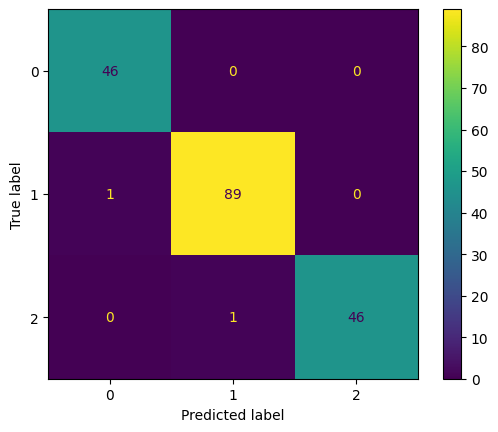

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

plt.show()

In [27]:
classifier.support_vectors_

array([[0.00186543, 0.0018613 , 0.56744262, 0.00185855, 0.36843804,
        0.05853407],
       [0.52858387, 0.00155088, 0.46520686, 0.00155148, 0.00155236,
        0.00155455],
       [0.00150303, 0.00150373, 0.63572054, 0.0014953 , 0.00150235,
        0.35827506],
       [0.0017327 , 0.00175617, 0.63392812, 0.00174633, 0.00174604,
        0.35909063],
       [0.00168745, 0.00169908, 0.54930024, 0.00168254, 0.00169522,
        0.44393547],
       [0.00171705, 0.00173927, 0.63746052, 0.00171592, 0.00173348,
        0.35563376],
       [0.0012098 , 0.00119729, 0.52229431, 0.47289191, 0.00120688,
        0.00119981],
       [0.00117743, 0.44528527, 0.49618168, 0.00117592, 0.00118893,
        0.05499077],
       [0.32141963, 0.00150197, 0.5362672 , 0.0798248 , 0.00151248,
        0.05947392],
       [0.00146609, 0.06157536, 0.60323222, 0.00146304, 0.00146907,
        0.33079422],
       [0.00163667, 0.21172534, 0.50404797, 0.00163647, 0.00164611,
        0.27930744],
       [0.00227039, 0

In [28]:
#menampilkan classification report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.99      0.99      0.99        90
           2       1.00      0.98      0.99        47

    accuracy                           0.99       183
   macro avg       0.99      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183



## Optimasi Model

In [29]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, verbose = 1, n_jobs = -1, cv = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [30]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [31]:
grid.score(X_train, Y_train), grid.score(X_test, Y_test)

(0.9986301369863013, 1.0)

In [32]:
# {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
# {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
model = SVC(C=0.1, gamma=0.1, kernel="rbf")
model.fit(X_train, Y_train)

model.score(X_train, Y_train), model.score(X_test, Y_test)

(0.9794520547945206, 0.9562841530054644)

In [33]:
#menampilkan classification report
Y_predict = model.predict(X_test)
accuracy = classification_report(Y_test, Y_predict)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.92      1.00      0.96        90
           2       1.00      0.91      0.96        47

    accuracy                           0.96       183
   macro avg       0.97      0.94      0.96       183
weighted avg       0.96      0.96      0.96       183



## Gatau

In [34]:
# import matplotlib.pyplot as plt
# import seaborn as sn
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split

In [35]:
# from sklearn.cluster import KMeans
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import train_test_split
# # from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

In [36]:
# # Langkah 1: Lakukan clustering (misalnya, K-Means)
# k_means = KMeans(n_clusters=2, random_state=42)  # Ganti num_clusters dengan jumlah cluster yang sesuai
# clus_labels = kmeans.fit_predict(TF)  # Ganti data_features dengan fitur-fitur yang relevan

# # Langkah 2: Lakukan Linear Discriminant Analysis (LDA)
# ldaa = LinearDiscriminantAnalysis(n_components=6)  # Ganti num_components dengan jumlah komponen yang sesuai
# X_lda = ldaa.fit_transform(TF, clus_labels)

# # Langkah 3: Bagi data menjadi data pelatihan dan data uji
# X_train, X_test, y_train, y_test = train_test_split(X_lda, labels, test_size=0.2)  # Ganti labels dengan label data Anda

# # Langkah 4: Latih model klasifikasi (misalnya, SVM)
# clf = SVC(kernel='linear')
# clf.fit(X_train, y_train)

# # Langkah 5: Prediksi kelas data uji
# y_pred = clf.predict(X_test)

# # Langkah 6: Evaluasi model
# accuracy = accuracy_score(y_test, y_pred)
# print("Akurasi model: {:.2f}%".format(accuracy * 100))


In [37]:
# center = kmeans.cluster_centers_
# center

In [38]:
# y_true = clus1['Clustering'].values.tolist()
# print(clus1['Clustering'].values.tolist())

In [39]:
# res = []
# for i in cluster_labels:
#     if i == 0:
#         res.append(0)
#     elif i == 1:
#         res.append(1)
#     else:
#         res.append(2)
# print(res)

In [40]:
# n = len(y_true)
# for i in range(n):
#     print(res[i],"\t : ",y_true[i])

In [41]:
# from sklearn.metrics import accuracy_score
# print ("Accuracy : ",
#     accuracy_score(y_true, res)*100)

In [42]:
# import numpy as np
# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [43]:
# # Perform LDA for clustering
# # n_topics = 3  # You can change the number of topics
# lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
# X_topics = kmeans.fit_transform(X)

In [44]:
# X_train, X_test, y_train, y_test = train_test_split(X_topics, newsgroups.target, test_size=0.2, random_state=42)

In [45]:
# # Train a classifier (e.g., Naive Bayes) on the LDA topic features
# classifier = MultinomialNB()
# classifier.fit(X_train, y_train)

# # Predict the class labels on the test set
# y_pred = classifier.predict(X_test)

# # Calculate and print the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}'